# Guided Project - Visualizing Earnings Based On College Majors:

### 1. Introduction:
In this project, we've been creating plots using pyplot and matplotlib directly. When we want to explore a new dataset by quickly creating visualizations, using these tools directly can be cumbersome. Thankfully, pandas have many methods for quickly generating common plots from data in DataFrames. Like pyplot, the plotting functionality in pandas is a wrapper for matplotlib. This means we can customize the plots when necessary by accessing the underlying Figure, Axes, and other matplotlib objects.

In this guided project, we'll explore how using the pandas plotting functionality along with the Jupyter notebook interface allows us to explore data quickly using visualizations.

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

`Rank` - Rank by median earnings (the dataset is ordered by this column).

`Major_code` - Major code.

`Major` - Major description.

`Major_category` - Category of major.

`Total` - Total number of people with major.

`Sample_size` - Sample size (unweighted) of full-time.

`Men` - Male graduates.

`Women` - Female graduates.

`ShareWomen` - Women as a share of the total.

`Employed` - Number employed.

`Median` - Median salary of full-time, year-round workers.

`Low_wage_jobs` - Number in low-wage service jobs.

`Full_time` - Number employed 35 hours or more.

`Part_time` - Number employed less than 35 hours.


Using visualizations, we can start to explore questions from the dataset like:

- **Do students in more popular majors make more money?**
> - Using scatter plots
- **How many majors are predominantly male? Predominantly female?**
> - Using histograms
- **Which category of majors have the most students?**
> - Using bar plots
-------
-------
###### Before We go further:
We want to thank to **Jonathan Soma** that he provide [very well prepared guidelines](http://jonathansoma.com/lede/data-studio/matplotlib/adding-grid-lines-to-a-matplotlib-chart/) for creating plots. Thank's to him, now we have the knowledge, how to create more accurate plots. *This will be used from the part of the histogram.*

[Additional guidelines for background colors ](https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color) will be use in this project too. The color palette will be based on [the xkcd color survey](https://xkcd.com/color/rgb/). Code needed to add this colors is prefixed with `'xkcd:'` **(e.g., 'xkcd:sky blue')**. Full code:
> ax.set_facecolor('xkcd:green')

-----------------
---------------

We'll explore how to do these and more while primarily working in pandas. Before we start creating data visualizations, let's import the libraries we need and remove rows containing null values.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# The Jupyter magic %matplotlib inline allows plots to be displayed inline.
%matplotlib inline 

In [3]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

In [4]:
# Use DataFrame.head() and DataFrame.tail() 
# to become familiar with how the data is structured.
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [6]:
# Use DataFrame.describe() to generate summary statistics 
# for all of the numeric columns.
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# Let's get some info about the objects type too:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

###### We will drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors:

In [8]:
raw_data_count = len(recent_grads.axes[0])
raw_data_count

173

In [9]:
recent_grads = recent_grads.dropna() # remowing rows with NaN

# Asigning clean dataframe numbers of rows:
cleaned_data_count = len(recent_grads.axes[0])
cleaned_data_count

172

After cleaning only one row contained missing values was detected and dropped.

-------------------
### 2. Pandas, Scatter Plots:

Most of the plotting functionality in pandas is contained within the [DataFrame.plot()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) method. When we call this method, we specify the data we want plotted as well as the type of plot. We use the kind parameter to specify the type of plot we want. We use x and y to specify the data we want on each axis. You can read about the different parameters in the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html).

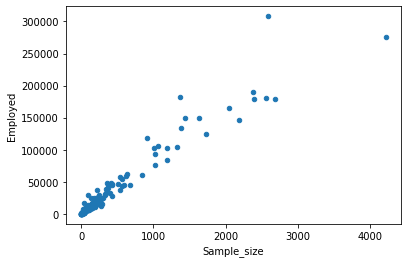

In [10]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

If we create a new cell in jupyter notebook and run the above code, the scatter plot will be displayed immediately. This functionality is a byproduct of running the jupyter magic `%matplotlib inline`. This means we can write one line of code to generate a scatter plot, run the cell using a keyboard shortcut, inspect the plot, and repeat. The `DataFrame.plot()` method has a few parameters we can use for tweaking the scatter plot:

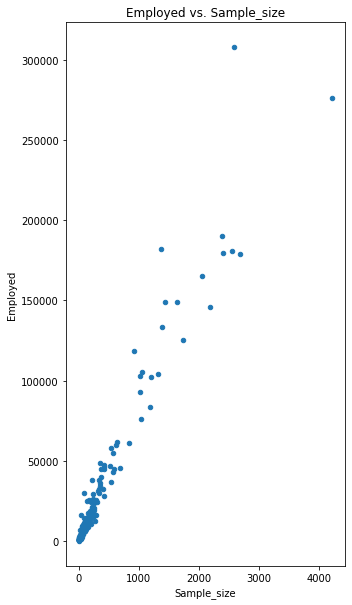

In [11]:
recent_grads.plot(
    x='Sample_size', y='Employed', 
    kind='scatter', 
    title='Employed vs. Sample_size', figsize=(5,10)
)

We can access the underlying matplotlib Axes object by assigning the return value to a variable:

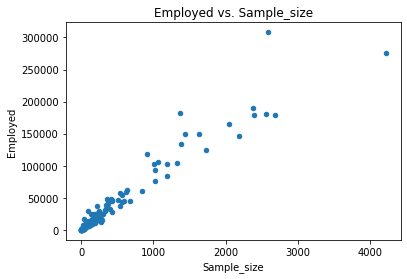

In [12]:
# `Sample_size` and `Employed`

ax_Sample_size_and_Employed = recent_grads.plot(
    x='Sample_size', y='Employed',
    kind='scatter').set_title(
    'Employed vs. Sample_size')

When we run the code above in a jupyter notebook cell, the plot will be returned inline just like before.

*We can see above that the correlation coefficient is strongly positive.*

---------------------

Now, we will generate scatter plots in separate jupyter notebook cells to explore the following relations:
- `Sample_size` and `Median`
- `Sample_size` and `Unemployment_rate`
- `Full_time` and `Median`
- `ShareWomen` and `Unemployment_rate`
- `Men` and `Median`
- `Women` and `Median`

Then, we will use the plots to explore the following questions:

- **Do students in more popular majors make more money?**
- **Do students that majored in subjects that were majority female make more money?**
- **Is there any link between the number of full-time employees and median salary?**

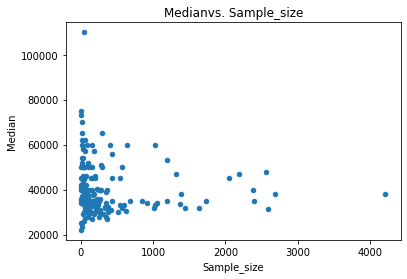

In [13]:
# `Sample_size` and `Median`

ax_Sample_size_and_Median = recent_grads.plot(
    x='Sample_size', y='Median',
    kind='scatter').set_title(
    'Medianvs. Sample_size')

We can see above that the correlation coefficient is strongly negative.

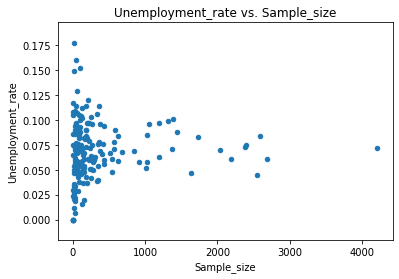

In [14]:
# `Sample_size` and `Unemployment_rate`

ax_Sample_size_and_Unemployment_rate = recent_grads.plot(
    x='Sample_size', y='Unemployment_rate',
    kind='scatter').set_title(
    'Unemployment_rate vs. Sample_size')

We can see above that the correlation coefficient is strongly negative, but little less than `Sample_size` and `Median` correlation.

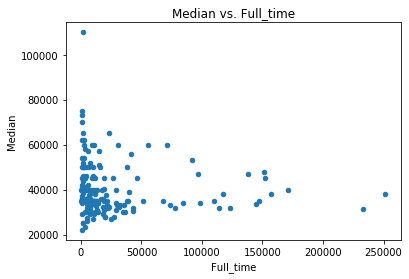

In [15]:
# `Full_time` and `Median`

ax_Sample_size_and_Unemployment_rate = recent_grads.plot(
    x='Full_time', y='Median',
    kind='scatter').set_title(
    'Median vs. Full_time')

We can see above that the correlation coefficient is strongly negative, but little less than `Sample_size` and `Median` correlation.
This correlation quite similar to `Full_time` and `Median`, but noticibly little less negative.

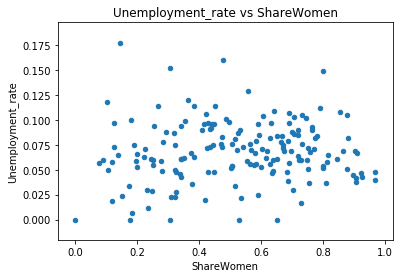

In [16]:
# `ShareWomen` and `Unemployment_rate`

ax_Sample_size_and_Unemployment_rate = recent_grads.plot(
    x='ShareWomen', y='Unemployment_rate',
    kind='scatter').set_title(
    'Unemployment_rate vs ShareWomen')

We can see above that the correlation coefficient is very weak. Neither positive, nor negative.

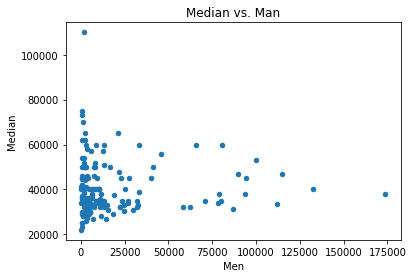

In [17]:
# `Men` and `Median`

ax_Sample_size_and_Unemployment_rate = recent_grads.plot(
    x='Men', y='Median',
    kind='scatter').set_title(
    'Median vs. Man')

We can see above that the correlation coefficient is strongly negative, but little less than `Sample_size` and `Median` correlation.
This correlation quite similar to `Full_time` and `Median`.

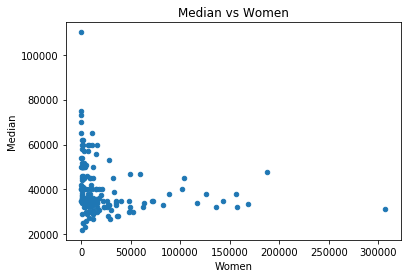

In [18]:
# `Women` and `Median`

ax_Sample_size_and_Unemployment_rate = recent_grads.plot(
    x='Women', y='Median',
    kind='scatter').set_title(
    'Median vs Women')

We can see above that the correlation coefficient is strongly negative but little less than `Sample_size` and `Median` correlation.
This correlation is quite similar to `Full_time` and `Median`. It's even more similar to `Full_time` and `Median` than to  `Men` and `Median`.

-----
As a practice and additional task, we will create one figure with all scatter plots. It will show us all the scatters once again, before the final conclusion and answer to all questions.

<Figure size 432x288 with 0 Axes>

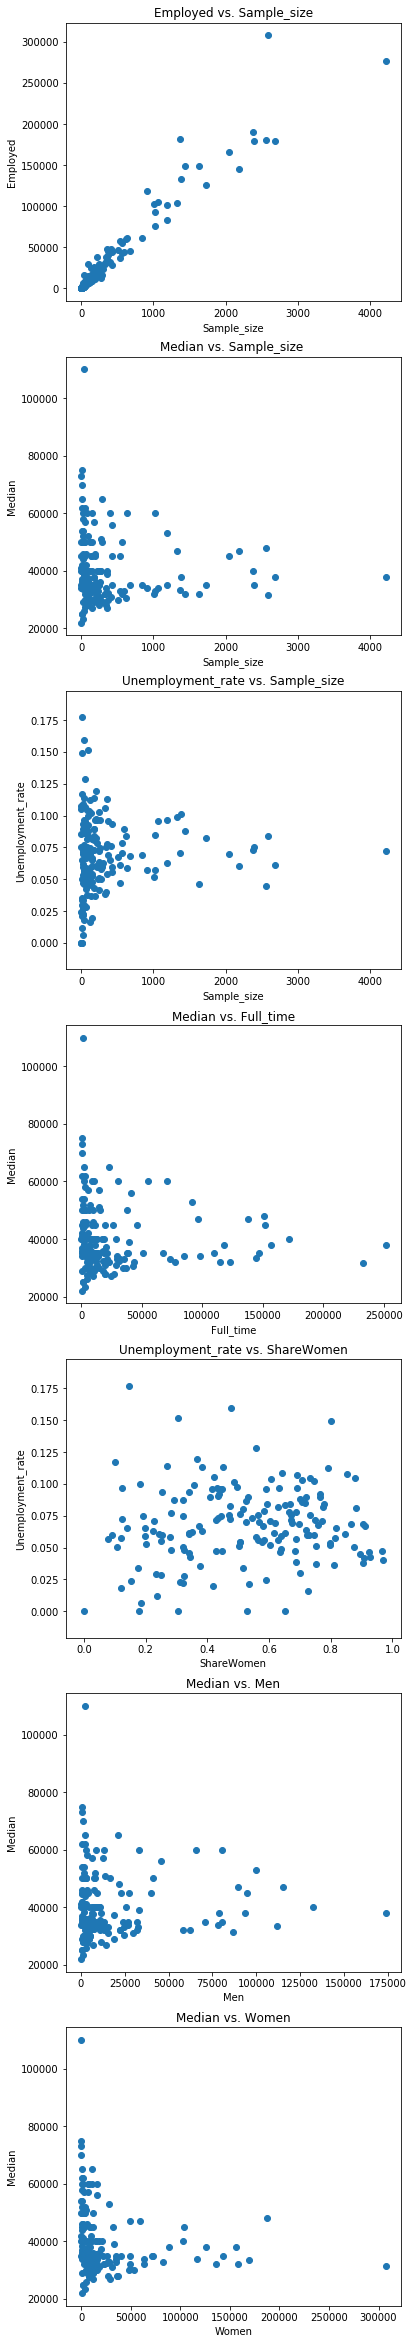

<Figure size 432x288 with 0 Axes>

In [19]:
# The code below create one space that will display all plots at once:
 
fig, ax = plt.subplots(7, figsize=(6,42)) 


# ax=ax[] in codes after are needed to bond all plots with the code above
# `Sample_size` and `Employed`
ax[0].scatter(
    x = recent_grads['Sample_size'],
    y = recent_grads['Employed'])
ax[0].set_xlabel('Sample_size')
ax[0].set_ylabel('Employed')
ax[0].set_title('Employed vs. Sample_size')

# `Sample_size` and `Median`

ax[1].scatter(
    x = recent_grads['Sample_size'],
    y = recent_grads['Median'])
ax[1].set_xlabel('Sample_size')
ax[1].set_ylabel('Median')
ax[1].set_title('Median vs. Sample_size ')

# `Sample_size` and `Unemployment_rate`

ax[2].scatter(
    x = recent_grads['Sample_size'],
    y = recent_grads['Unemployment_rate'])
ax[2].set_xlabel('Sample_size')
ax[2].set_ylabel('Unemployment_rate')
ax[2].set_title('Unemployment_rate vs. Sample_size')

# `Full_time` and `Median`

ax[3].scatter(
    x = recent_grads['Full_time'],
    y = recent_grads['Median'])
ax[3].set_xlabel('Full_time')
ax[3].set_ylabel('Median')
ax[3].set_title('Median vs. Full_time')


# `ShareWomen` and `Unemployment_rate`

ax[4].scatter(
    x = recent_grads['ShareWomen'],
    y = recent_grads['Unemployment_rate'])
ax[4].set_xlabel('ShareWomen')
ax[4].set_ylabel('Unemployment_rate')
ax[4].set_title('Unemployment_rate vs. ShareWomen')


# `Men` and `Median`

ax[5].scatter(
    x = recent_grads['Men'],
    y = recent_grads['Median'])
ax[5].set_xlabel('Men')
ax[5].set_ylabel('Median')
ax[5].set_title('Median vs. Men')

# `Women` and `Median`

ax[6].scatter(
    x = recent_grads['Women'],
    y = recent_grads['Median'])
ax[6].set_xlabel('Women')
ax[6].set_ylabel('Median')
ax[6].set_title('Median vs. Women')

plt.figure()


Before we answer 3 questions, let's see all the conclusions from each scatter once again:

**n. 0 `Sample_size` and `Employed`**:
We can see above that the correlation coefficient is strongly positive.


**n. 1 `Sample_size` and `Median`**:
We can see above that the correlation coefficient is strongly negative.


**n. 2 `Sample_size` and `Unemployment_rate`**:
We can see above that the correlation coefficient is strongly negative but little less than `Sample_size` and `Median` correlation.


**n. 3 `Full_time` and `Median`**:
We can see above that the correlation coefficient is strongly negative but little less than `Sample_size` and `Median` correlation.
This correlation quite similar to `Full_time` and `Median`, but noticeably little less negative.


**n. 4 `ShareWomen` and `Unemployment_rate`**:
We can see above that the correlation coefficient is very weak. Neither positive nor negative.


**n. 5 `Men` and `Median`**:
We can see above that the correlation coefficient is strongly negative but little less than `Sample_size` and `Median` correlation.
This correlation is quite similar to `Full_time` and `Median`.


**n. 6 `Women` and `Median`**:
We can see above that the correlation coefficient is strongly negative but little less than `Sample_size` and `Median` correlation.
This correlation is quite similar to `Full_time` and `Median`. It's even more similar to `Full_time` and `Median`, than to  `Men` and `Median`

---------
### The answers for posted questions are:

*Do students in more popular majors make more money?:*
- ** No, the only correlation is related to having a job. It seems to be easier to find one after finishing a popular major. But the belief that because of that, those people will ear more is not true.  

*Do students that majored in subjects that were majority female make more money?:*
- ** No, the majority of men make more money. On the other hand, it seems that there are more woman specialists that earn more money on the majors that are less popular in society. 

*Is there any link between the number of full-time employees and median salary?:*
- ** We can't tell is there a link between those two factors: At this moment we compare groups of students ( according to major). To know the answer, we should add all students as one group that has a full-time job and then, that should be compared to the median salary ( of those students only). After that, we should compare it to the same group of students that has only a part-time job vs. median salary(of those students only). We don't have a median split to full-time and part-time. So there is no way to compare. Now, we have just one, collective, median for both. 

----------------

### 3. Pandas, Histograms:

To explore the distribution of values in a column, we can select it from the DataFrame, call [Series.plot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html), and set the `kind` parameter to `hist`:

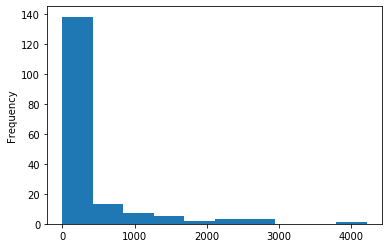

In [20]:
recent_grads['Sample_size'].plot(kind='hist')

The `DataFrame.plot()` and `Series.plot()` methods have many of the same parameters but are used for different use cases. We use `Series.plot()` to plot a specific column and `DataFrame.plot()` to generate plots that use values from multiple columns. For example, because scatter plots are generated using 2 sets of values (one for each axis), we can't create a scatter plot using `Series.plot()`.

If we've looked at the documentation for `Series.plot()`, we'll notice there is no way to control the binning strategy for histograms. Luckily, we can control the binning strategy of a histogram using [Series.hist()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.hist.html), which contains parameters specific to customizing histograms:

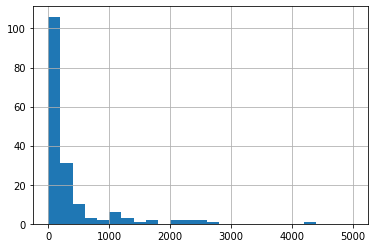

In [21]:
recent_grads['Sample_size'].hist(bins=25, range=(0,5000))


----------------

In this part we will generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:

- `Sample_size`

- `Median`

- `Employed`

- `Full_time`

- `ShareWomen`

- `Unemployment_rate`

- `Men`

- `Women`

We are willing to experiment with different bin sizes and ranges when generating these histograms, to find the best display:

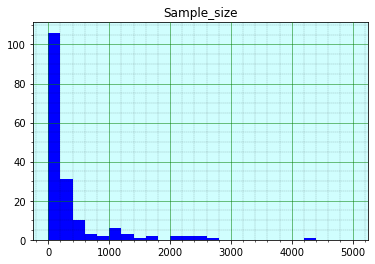

In [22]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Sample_size'].hist(bins=25, range=(0,5000), ax=ax, color='blue') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Sample_size')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

# Add background color:
ax.set_facecolor('xkcd:pale blue')

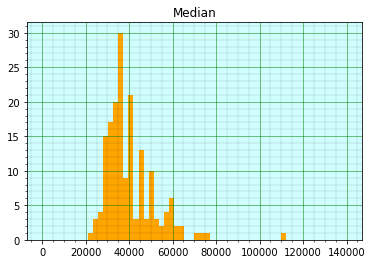

In [23]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Median'].hist(bins=60, range=(0,140000), ax=ax, color='orange') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Median')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

# Add background color:
ax.set_facecolor('xkcd:pale blue')

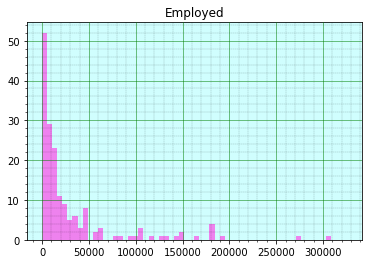

In [24]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Employed'].hist(bins=60, range=(0,325000), ax=ax, color='violet') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Employed')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

# Add background color:
ax.set_facecolor('xkcd:pale blue')

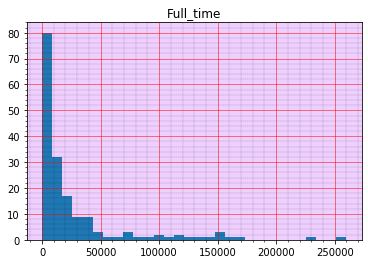

In [25]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Full_time'].hist(bins=30, range=(0,260000), ax=ax) # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Full_time')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.25', color='black')

# Add background color:
ax.set_facecolor('xkcd:pale lavender')

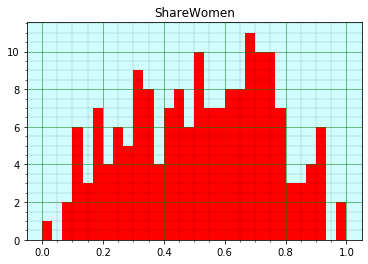

In [26]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['ShareWomen'].hist(bins=30, range=(0,1), ax=ax, color='red') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('ShareWomen')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.3', color='black')

# Add background color:
ax.set_facecolor('xkcd:pale blue')

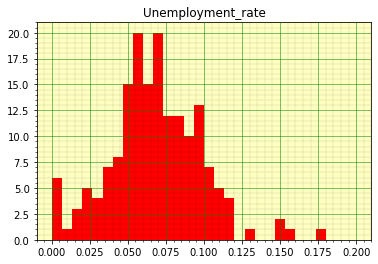

In [27]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Unemployment_rate'].hist(bins=30, range=(0, 0.2), ax=ax, color='red') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Unemployment_rate')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.2', color='black')

# Add background color:
ax.set_facecolor('xkcd:cream')

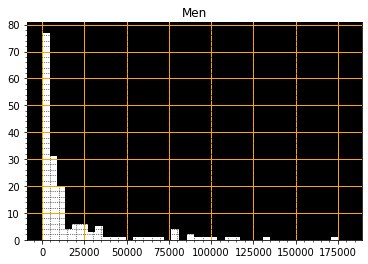

In [28]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Men'].hist(bins=40, range=(0, 180000), ax=ax, color='white') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Men')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', color='orange')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.7', color='black')

# Add background color:
ax.set_facecolor('xkcd:black')

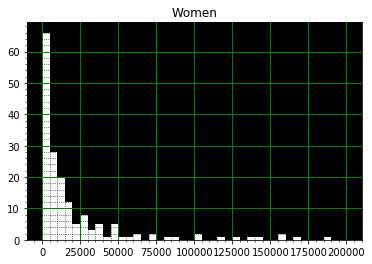

In [29]:
fig, ax = plt.subplots() # Additional grid lines code part 1

# Establish histogram 
recent_grads['Women'].hist(bins=40, range=(0, 200000), ax=ax, color='white') # ax=ax needed for: 'fig, ax = plt.subplots()'

#Establish tittle for histogram:
ax.title.set_text('Women')

# Additional grid lines code part 2 (all below):

# Don't allow the axis to be on top of your data
ax.set_axisbelow(False)

# Turn on the minor TICKS, which are required for the minor GRID
ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='1', color='green')
# Customize the minor grid
ax.grid(which='minor', linestyle=':', linewidth='0.7', color='black')

# Add background color:
ax.set_facecolor('xkcd:black')

##### Histograms: conclusion.

- There are many potential conclusions that we can get from histograms. What's, probably, the most obvious: it's not easy to get a well-paid job. The success isn't guaranteed even if someone chooses a popular major. This is a very important point because one of the most influential reasons for choosing a particular major is the belief that it will make life easier by giving as a consequence of choosing, more money. 

- Another conclusion is: there is a good chance that getting major will provide a salary between 30,000`$` -  42,000`$` annually. 

- `Employed` histogram may show little more if we compare it with 'Total' (a total number of people with major.)

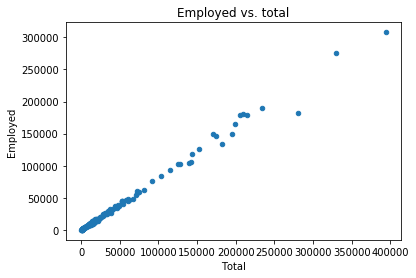

In [30]:
# `Total` and `Employed`

ax_total_and_employed = recent_grads.plot(
    x='Total', y='Employed',
    kind='scatter').set_title(
    'Employed vs. total')
plt.show()

- We can see on the scatter plot above that there are more dots below the correlation coefficient. The higher `total` value ( number of people with major), the more dots below correlation coefficient. That means that there are fewer chances of getting a job on majors that are more popular.

### 4. Pandas, Scatter Matrix Plot

In the last 2 steps, we created individual scatter plots to visualize potential relationships between columns and histograms to visualize the distributions of individual columns. A `scatter matrix plot` combines both scatter plots and histograms into one grid of plots and allows us to explore potential relationships and distributions simultaneously. A scatter matrix plot consists of `n` by `n` plots on a grid, where `n` is the number of columns, the plots on the diagonal are histograms, and the non-diagonal plots: scatter plots.

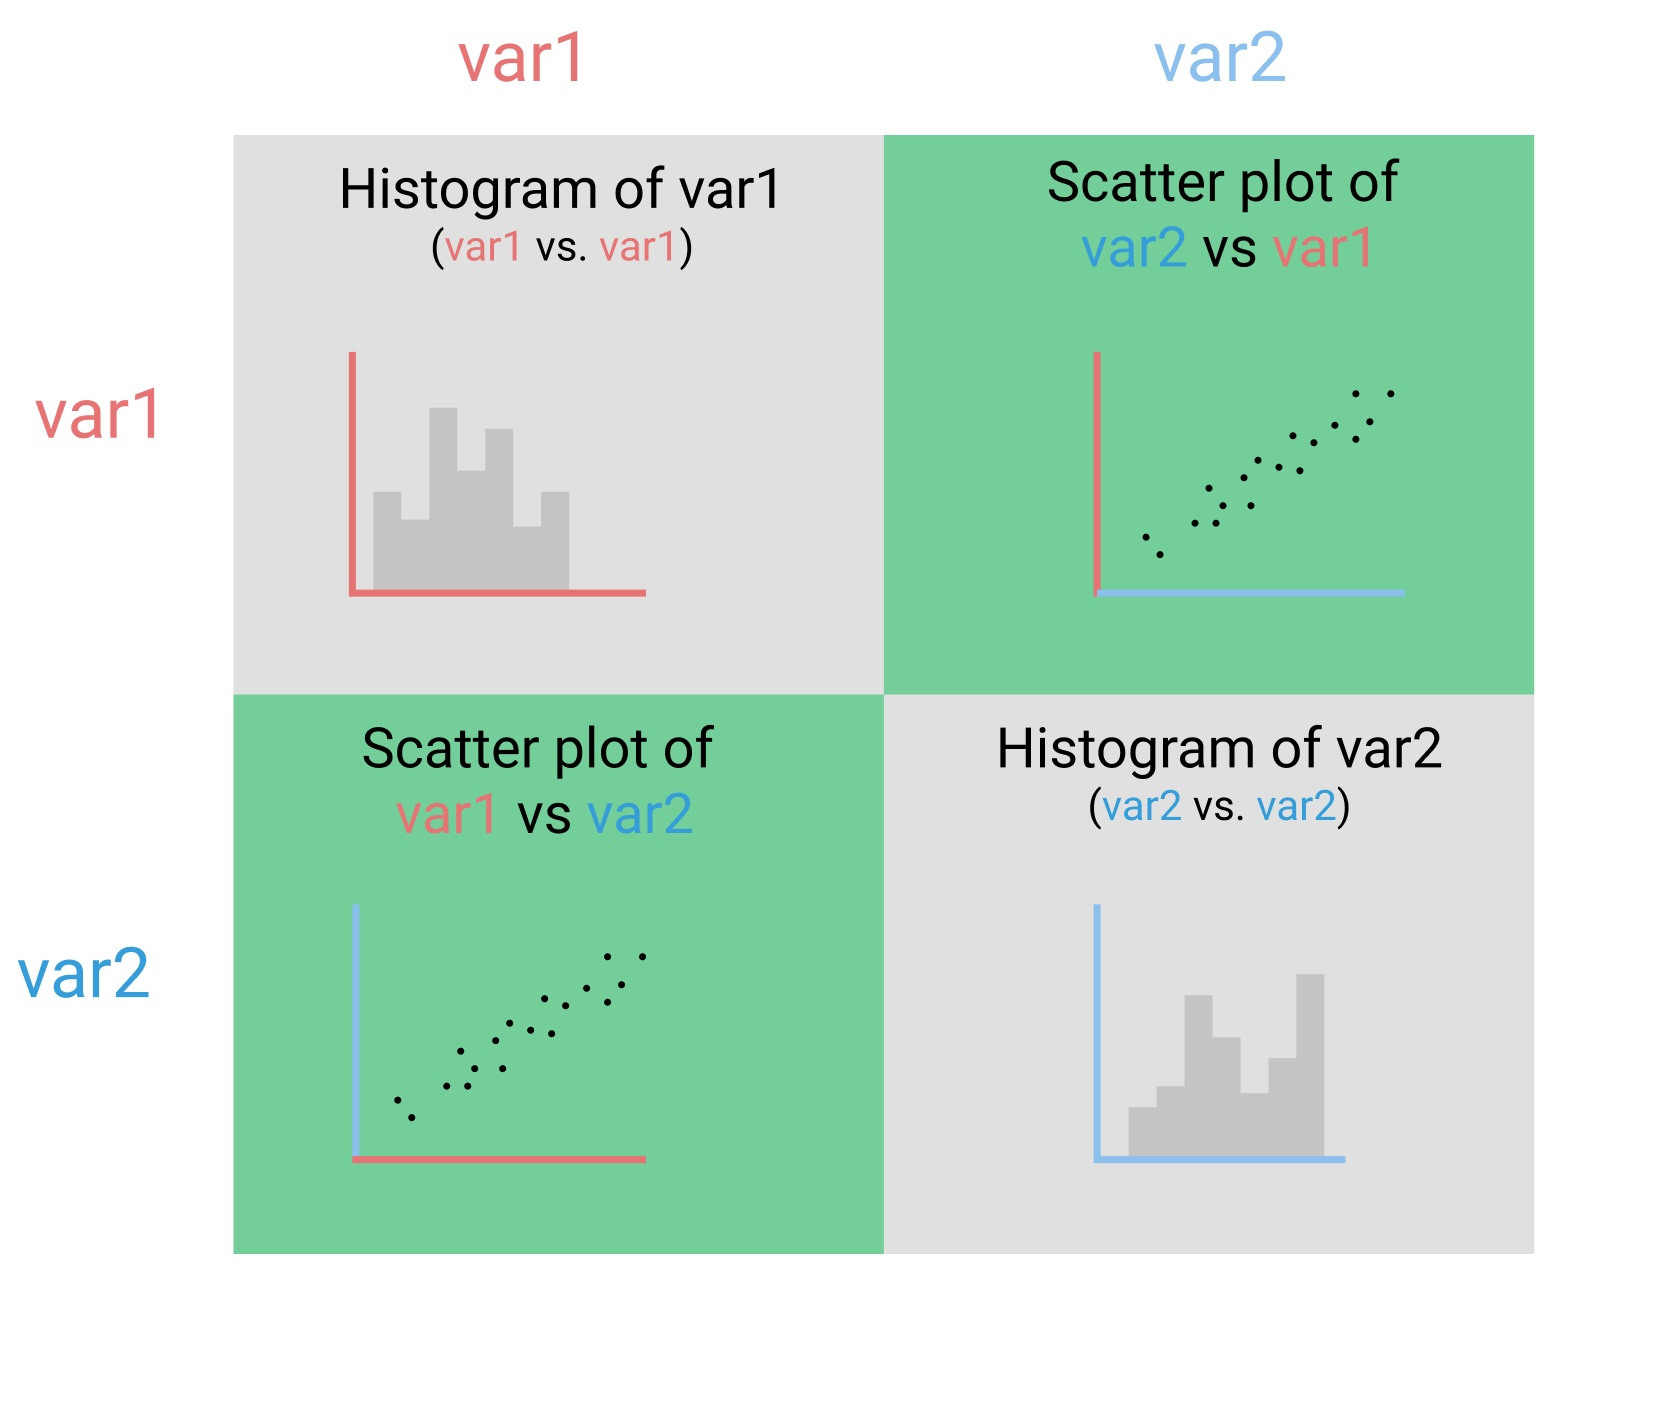

In [31]:
#Import library
from IPython.display import Image

# Load image from local storage
Image(filename = "scatterplot_matrix_intro.jpg", width = 600, height = 300)

Because scatter matrix plots are frequently used in the exploratory data analysis, pandas contain a function named `scatter_matrix()` that generates the plots for us. This function is part of the `pandas.plotting` module and needs to be imported separately. To generate a scatter matrix plot for 2 columns, select just those 2 columns and pass the resulting DataFrame into the `scatter_matrix()` function.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DE8996048>,
      dtype=object)

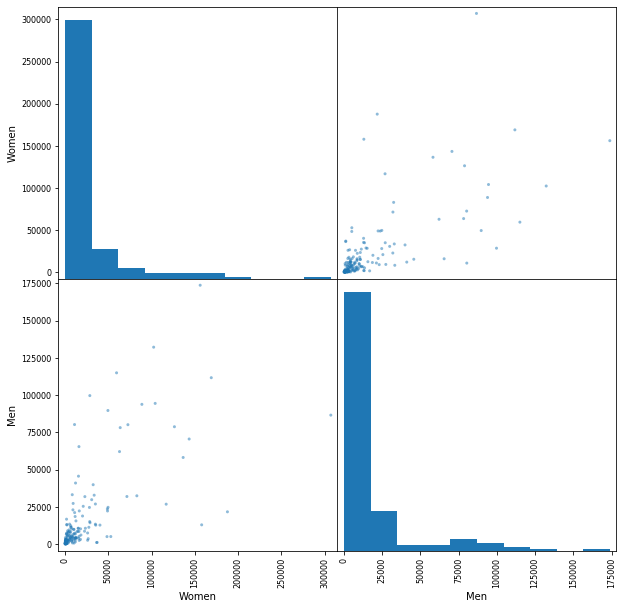

In [32]:
# Import scatter_matrix from the pandas.plotting module:
from pandas.plotting import scatter_matrix

scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). If we increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if we increase the plotting area using the `figsize` parameter).

If you want to read more about the parameters the function accepts, head to the [documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html).

--------

**Because our histograms are vertical(bars goes from the bottom, up), we will use(analyse) only scatter plots that are below our histograms (in the matrix).** *This is related to the coordinate system.*

Let's start with a simple matrix and after that, we will do some more complex:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DE762B548>,
      dtype=object)

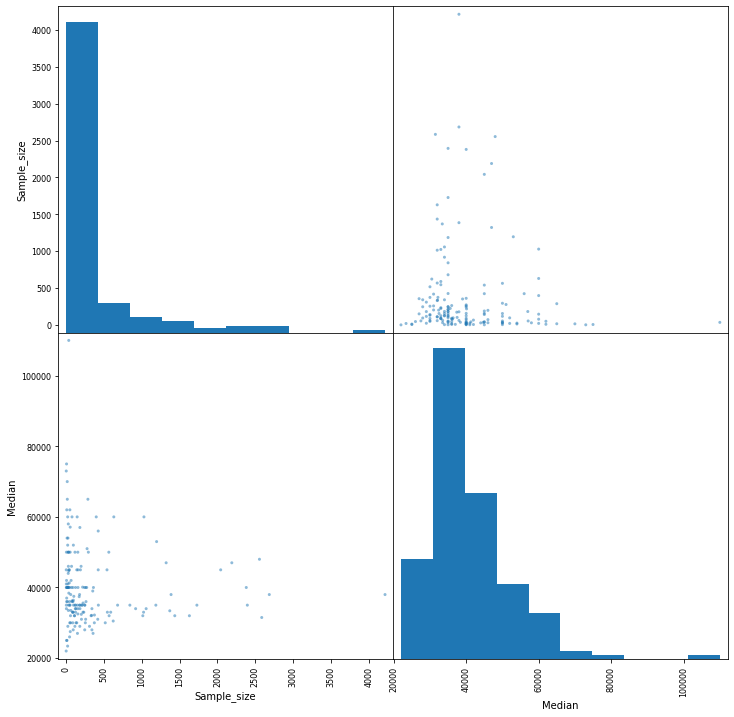

In [33]:
# Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(12,12))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DE8D35B48>,
      dtype=object)

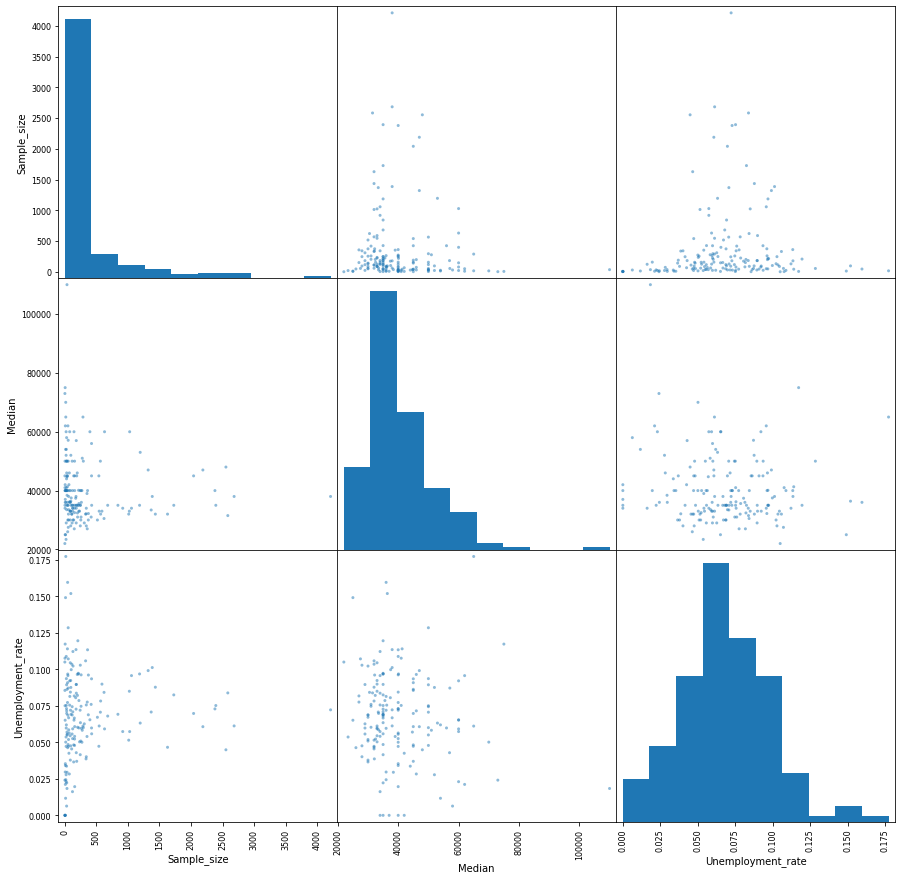

In [34]:
# Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(15,15))

As we can see there is a correlation between `Sample_size` and both: `Median` and `Unemployment_rate`. Majors that have smaller popularity can ensure a job very well paid - on one hand. But, on the other hand: there is also more unemployed after such majors. It's safe to say, that when someone chooses a less popular major, he or she risks more, but gain more too. 

-------------------
### 5. Pandas, Bar Plots:
To create bar plots in matplotlib, we had to specify many aspects of the bar plot ourselves. We had to specify the locations, labels, lengths, and widths of the bars. When creating bar plots using pandas, we only need to specify the data we want the bars to represent and the labels for each bar. The following code returns a bar plot of the first 5 values in the `Women` column:


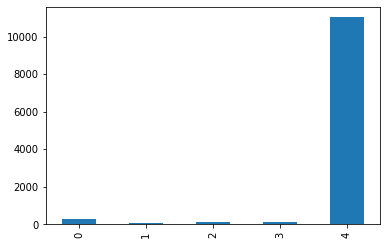

In [35]:
recent_grads[:5]['Women'].plot(kind='bar')
plt.show()

By default, pandas will use the default labels on the x-axis for each bar (`1` to `n`) from matplotlib. If we instead use the [DataFrame.plot.bar()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.bar.html) method, we can use the `x` parameter to specify the labels and the `y` parameter to specify the data for the bars:

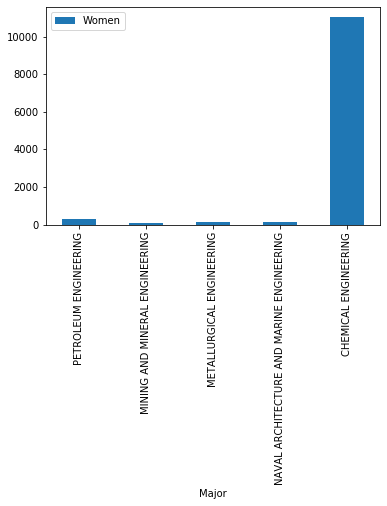

In [36]:
recent_grads[:5].plot.bar(x='Major', y='Women')

plt.show()

In this part we will:
- Use bar plots to compare the percentages of women (`ShareWomen`) from the first ten rows and the last ten rows of the `recent_grads` data frame.
- Use bar plots to compare the unemployment rate (`Unemployment_rate`) from the first ten rows and the last ten rows of the `recent_grads` data frame.

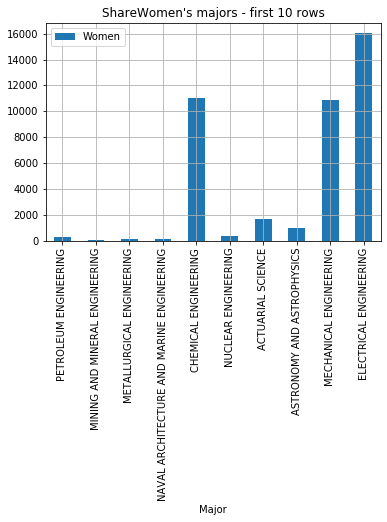

In [37]:
recent_grads[:10].plot.bar(
    x='Major',
    y='Women',
    title="ShareWomen's majors - first 10 rows",
    grid=True) # First 10 rows

plt.show()

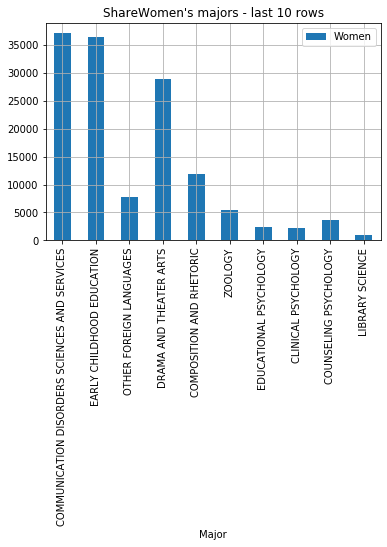

In [38]:
recent_grads[-10:].plot.bar(
    x='Major',
    y='Women',
    title="ShareWomen's majors - last 10 rows",
    grid=True) # Last 10 rows

From the first and last 10 rows of `ShareWoman` (Women as a share of total) we can conclude, that the highest amount of `Majors` was on(descending):
1. Communication disorders sciences and services
2. Early childhood education
3. Drama and theatre arts
4. electrical engineering
5. chemical engineering 
6. mechanical engineering


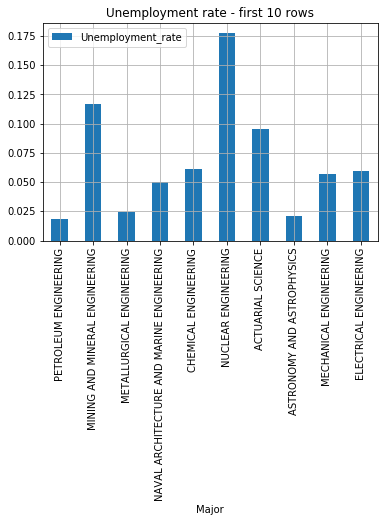

In [39]:
recent_grads[:10].plot.bar(
    x='Major',
    y='Unemployment_rate',
    title="Unemployment rate - first 10 rows",
    grid=True) # first 10 rows

plt.show()

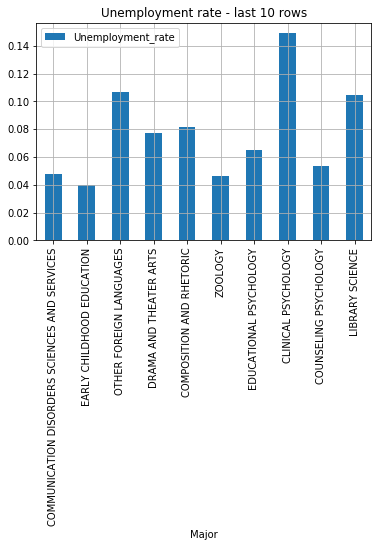

In [40]:
recent_grads[-10:].plot.bar(
    x='Major',
    y='Unemployment_rate',
    title="Unemployment rate - last 10 rows",
    grid=True) # last 10 rows

plt.show()

From the first and last 10 rows of `Unemployment_rate`, we can conclude, that the highest amount of the people, with `Majors`, that couldn't find a job was on(descending):

1. Nuclear engineering
2. Clinical psychology
3. Mining and mineral engineering 
4. Other foreign languages
5. Library science

------------------------
### 6. Next steps:

In this guided project, we learned how to use the plotting tools built into pandas to explore data on job outcomes. If you head over to the documentation on plotting in pandas, you'll notice that there's built-in support for many more plots.

For some next steps we:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.
- **Use a box plot to explore: how much could be earned in each of the Major_category's**

----------------

### Use a grouped bar plot to compare the number of men with the number of women in each category of majors:

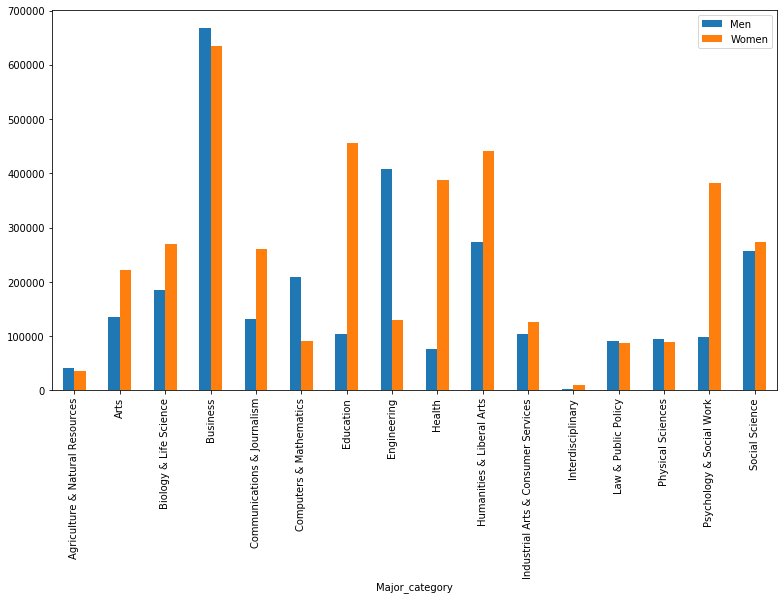

In [41]:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(13, 7))

plt.show()

------------------------

We can see that:
- most people chose a Business major.
- top feminine major is Health
- top masculine major in Engineering 
- the least people chose Interdisciplinary



###### (Additional) 
### Compare the average and median of men with the average and median of women in each category of majors:
For creating bar plot for this problem we will use code inspired by data from [matplotlib.org  -->  Grouped bar chart with labels](https://matplotlib.org/3.1.0/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py). Another thing in use will be: **loops for aggregation.**

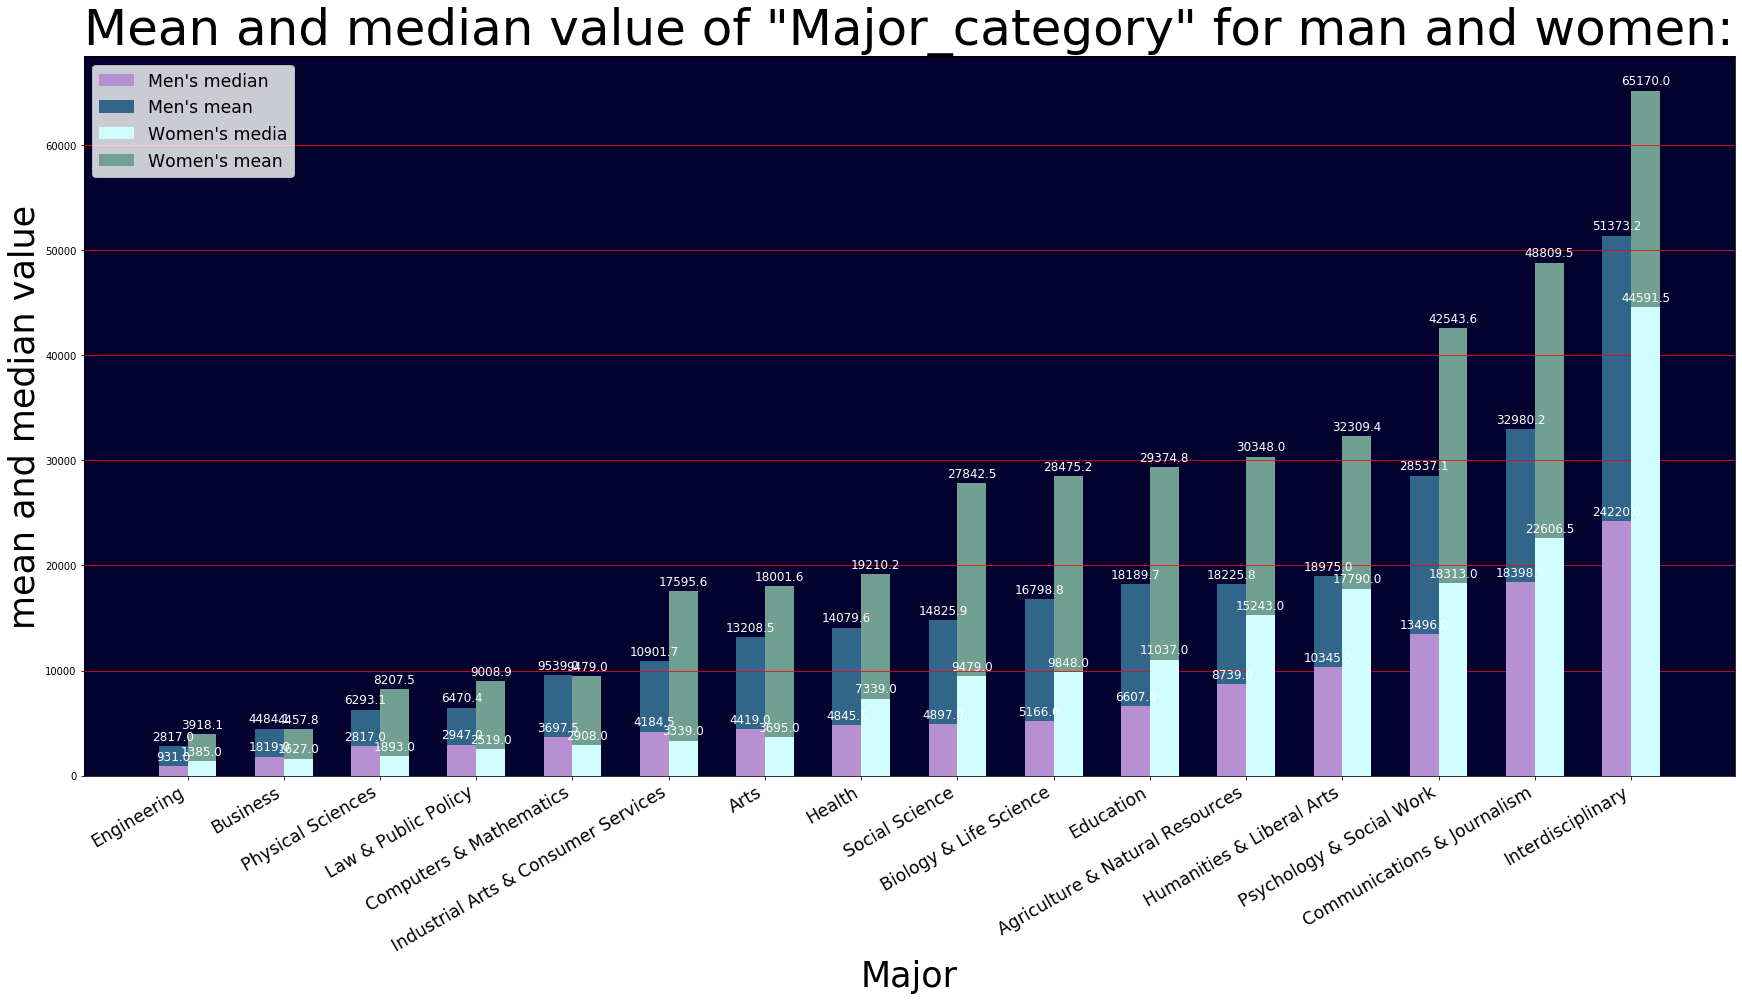

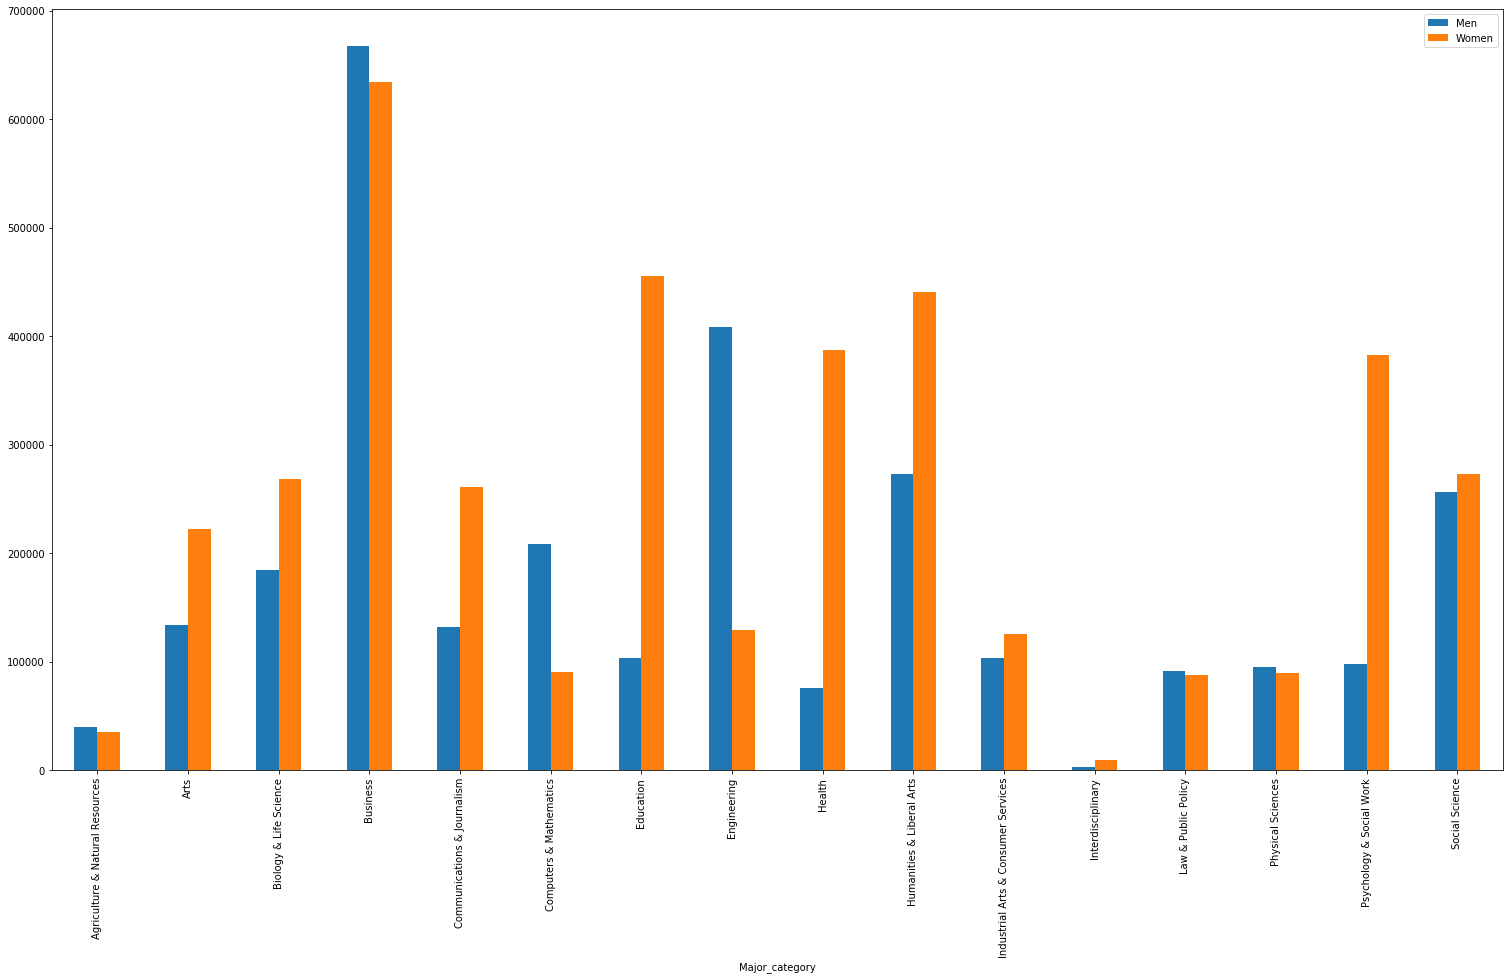

In [42]:
# Use a grouped bar plot to compare the number of men with the number of women in each category of majors:

import numpy as np

men_major_category_median_unsorted  = {}
women_major_category_median_unsorted = {}
men_major_category_mean_unsorted = {}
women_major_category_mean_unsorted = {}

# We need index num and unique `Major_category`:
for x in recent_grads['Major_category'].unique():
    unique_majors = recent_grads[
        recent_grads['Major_category'] == x
    ]
    median_men = unique_majors['Men'].median()
    median_women = unique_majors['Women'].median()
    mean_men = unique_majors['Men'].mean()
    mean_women = unique_majors['Women'].mean()
    
    men_major_category_median_unsorted[x] = median_men
    women_major_category_median_unsorted[x] = median_women
    men_major_category_mean_unsorted[x] = mean_men
    women_major_category_mean_unsorted[x] = mean_women
    
def sort_dict(dictionary): # sorting dictionary #thx to Elena_Kosourova:)
    """"
    We create the definition that will sort 
    dictionary by the value(later, we will have cooler bar plot):
    """
    
    import operator
    dictionary = (sorted(dictionary.items(),
                         key=operator.itemgetter(1),
                         reverse=False)
                 )# reverse: the highest value on top
    return dict(dictionary) #  The result sorted_by_value will be a list of tuples without dict() !!!

def round_dictionary(dictionary):
    """"
    Creating rounding function for dictionary
    """
    
    for k in dictionary:
        value = dictionary[k]
        round_value = round(value, 1)
        dictionary[k] = round_value
    return dictionary


def sort_and_round_dictionary(dictionary):
    """
    Merge of functions: round dictionary and sort dictionary 
    """
    return round_dictionary(sort_dict(dictionary))    
    

# sort dictionaries:

men_major_category_median = sort_and_round_dictionary(men_major_category_median_unsorted)
women_major_category_median = sort_and_round_dictionary(women_major_category_median_unsorted)
men_major_category_mean = sort_and_round_dictionary(men_major_category_mean_unsorted)
women_major_category_mean = sort_and_round_dictionary(women_major_category_mean_unsorted)
  
    
ind = np.arange(len(men_major_category_mean))  # the x locations for the groups
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(26,14))

median_men_bar = ax.bar(
    ind - width/2,
    men_major_category_median.values(),
    width,
    label="Men's median", color='xkcd:pale purple', zorder=2) # 'zorder' is bar layaut order

mean_men_bar = ax.bar(
    ind - width/2,
    men_major_category_mean.values(),
    width,
    label="Men's mean", color='xkcd:ugly blue', zorder=1) # 'zorder' is bar layaut order

median_women_bar = ax.bar(
    ind + width/2,
    women_major_category_median.values(),
    width,
    label="Women's media", color='xkcd:pale blue', zorder=2) # 'zorder' is bar layaut order

mean_women_bar = ax.bar(
    ind + width/2,
    women_major_category_mean.values(),
    width,
    label="Women's mean", color='xkcd:greyish teal', zorder=1) # 'zorder' is bar layaut order

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('mean and median value', fontsize=35)
ax.set_xlabel('Major', fontsize=35)
ax.set_title('Mean and median value of "Major_category" for man and women:', fontsize=50)
ax.set_xticks(ind)
ax.set_xticklabels(recent_grads['Major_category'].unique(),
    rotation=34.56789, fontsize='xx-large') # We will set xticklabels in angle to be easier to read)
# The labels are centred horizontally, so when we rotate them 34.56789°,
# they appear to be aligned with the wrong bar.
# To fix this, we align the labels to the right
# and they'll get back to their correct (visual) position:
fig.autofmt_xdate()

ax.legend(fontsize='xx-large')


def autolabel(rects, xpos='center'):
    """
    Attach a text label above each bar in *rects*, displaying its height.

    *xpos* indicates which side to place the text w.r.t. the center of
    the bar. It can be one of the following {'center', 'right', 'left'}.
    """

    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(offset[xpos]*3, 3),  # use 3 points offset
                    textcoords="offset points",  # in both directions
                    ha=ha[xpos], va='bottom', color='white', fontsize='large')


autolabel(median_men_bar, "center")
autolabel(mean_men_bar, "center")
autolabel(median_women_bar, "center")
autolabel(mean_women_bar, "center")

#let's do some grid, but only y-axis
ax.grid(color='xkcd:bright red', axis='y')

# background layout:
ax.set_facecolor('xkcd:midnight')

fig.tight_layout()

# Compare to the earlier plot:
recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(26, 14))

plt.show()

From the comparison of the last two plots, we can conclude that there is a lot of major's variety in most majors that had small sum value. Especially: 
- `Interdisciplinary`
- `Communication and Journalism`
- `Psychology & social work`

The conclusion is: the more humanistic major genre is, the more specialisation it has. 

Another conclusion is: the most popular major is a relative topic. On one hand, the popularity could depend on the number of people in a particular major category, on the other hand, there must be a reason why there are so many `Interdisciplinary` major specialisations. If there is demand, there is supply, so aren't they truly the most popular? The demand for `Interdisciplinary` major specialisations is almost 7 times greater than for `engineering`.

Last thing worth to mention: mean/median plot shows the difference between mean/median. It's interesting how values for each changed with different size of particular 'sex' bar(in particular major category). We can notice some negative correlations in some categories: when the mean bars shows that there are more women is major when median shows something in opposition. We can see these phenomena in majors such as:
- `physical sciences`
- `law & public policy`
- `industrial arts & computer services`
- `arts`

-----------------
### Use a box plot to explore the distributions of median salaries and unemployment rate.
##### median salaries:

Because there is great values scale difference between `Median` and `Unemployment_rate`, the only way to compare them is to use grouped box sub-plots. If we try to display both in one plot, no matter what limit we set on Y-axis, one of two boxes won't be visible.  

0.25    33000.0
0.50    36000.0
0.75    45000.0
Name: Median, dtype: float64

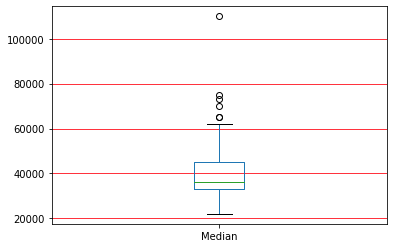

In [43]:
recent_grads['Median'].plot(kind='box').grid(color='xkcd:bright red', axis='y')

# Quantiles:
recent_grads['Median'].quantile([0.25, 0.5, 0.75])

- The bottom 1/4 of median salaries range around 33,000 USD.
- The top 1/4 of median salaries range around 45,000 USD.
- The median of median salaries is 36,000 USD.
- There are several outliers, with the maximum value beyond 100,000 USD.

At this point, we can check who earn so much (using boolean comparison): what major gives this kind of opportunity:

In [44]:
recent_grads[['Major', 'Median']][recent_grads['Median'] > 62000]

,Major,Median
0,PETROLEUM ENGINEERING,110000
1,MINING AND MINERAL ENGINEERING,75000
2,METALLURGICAL ENGINEERING,73000
3,NAVAL ARCHITECTURE AND MARINE ENGINEERING,70000
4,CHEMICAL ENGINEERING,65000
5,NUCLEAR ENGINEERING,65000


Now we can update our last markdown:
There are several outliers, with the maximum value of 110,000 USD.
Some of the `petroleum engineers` have the best salary of all.

-----------------

##### Unemployment rate:

0.25    0.050261
0.50    0.067544
0.75    0.087247
Name: Unemployment_rate, dtype: float64

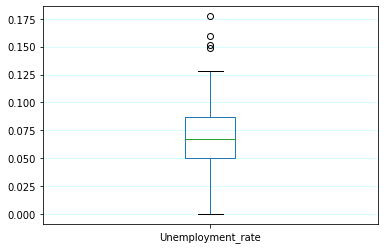

In [45]:
recent_grads['Unemployment_rate'].plot(kind='box').grid(color='xkcd:pale blue', axis='y')
 
# Quantiles:
recent_grads['Unemployment_rate'].quantile([0.25, 0.5, 0.75])

In [46]:
recent_grads[['Major', 'Unemployment_rate']][recent_grads['Unemployment_rate'] > 0.13]

,Major,Unemployment_rate
5,NUCLEAR ENGINEERING,0.177226
84,COMPUTER NETWORKING AND TELECOMMUNICATIONS,0.151850
89,PUBLIC ADMINISTRATION,0.159491
170,CLINICAL PSYCHOLOGY,0.149048


- The bottom 1/4 of unemployment rates range from 0 to 0.05.
- The top 1/4 of unemployment rates range from 0.087 to 0.13.
- The median of unemployment rates is 0.068.
- There are several outliers, with a maximum value of 0.177.

The major with the highest unemployment rate is a Nuclear Engineer.

-----------------
### Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project:

Quote from [How to create a hexagonal bin plot in SAS](https://blogs.sas.com/content/iml/2014/09/02/hexagonal-bin-plot.html): "*A hexagonal bin plot is created by covering the data range with a regular array of hexagons and colouring each hexagon according to the number of observations it covers. As with all bin plots, the hex-binned plots are good for visualizing large data sets for which a scatter plot would suffer from overplotting. The bin counts estimate the density of the observations.*"




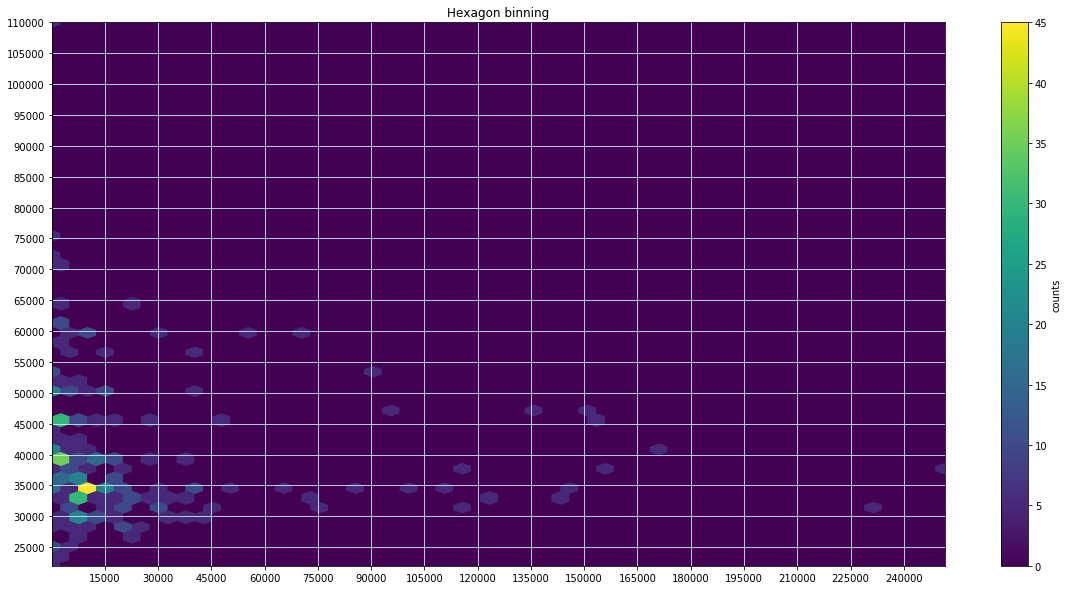

In [47]:
# recent_grads.plot.hexbin(x='Full_time', y='Median', gridsize=20)

fig, ax = plt.subplots(figsize=(20,10))
hex_plot = ax.hexbin(recent_grads['Full_time'], recent_grads['Median'], gridsize=10)


# Let's increase the number of x-ticks/y-ticks to 20:
ax.xaxis.set_major_locator(plt.MaxNLocator(20)) 
ax.yaxis.set_major_locator(plt.MaxNLocator(20)) 

#let's do some grid
ax.grid(color='xkcd:pale blue')

ax.set_title("Hexagon binning")
cb = fig.colorbar(hex_plot, ax=ax)
cb.set_label('counts')


hex_plot = ax.hexbin(recent_grads['Full_time'], recent_grads['Median'], gridsize=50)

plt.show()

### Use a box plot to explore: how much could be earned in each of the Major_category's.
#### Extra additional analysis:

There is one more thing that could be compared. How much could be earned in each of the `Major_category`'s?

To find out, we need to:
1. Create a dictionary that will have `Major_category` as key and mean `Median` of each category. 
2. Sort dictionary, so, later we will have more zen-style bar plot.
3. Prepare a bar plot that will give us as many pieces of information as possible. 

In [48]:
median_earning_and_unique_major_category_unsorted = {}

for m in recent_grads['Major_category'].unique():
    unique_majors = recent_grads[recent_grads['Major_category'] == m]
    median_earn = unique_majors['Median'].median()
    median_earning_and_unique_major_category_unsorted[m] = median_earn
    
# we will use `sort_dict` from part n. [42]:    
median_earning_and_unique_major_category = sort_dict(median_earning_and_unique_major_category_unsorted)  

# Test of the dictionary:

# for key in median_earning_and_unique_major_category:
#     print(key, ':', median_earning_and_unique_major_category[key]) # Print of unsorted dict

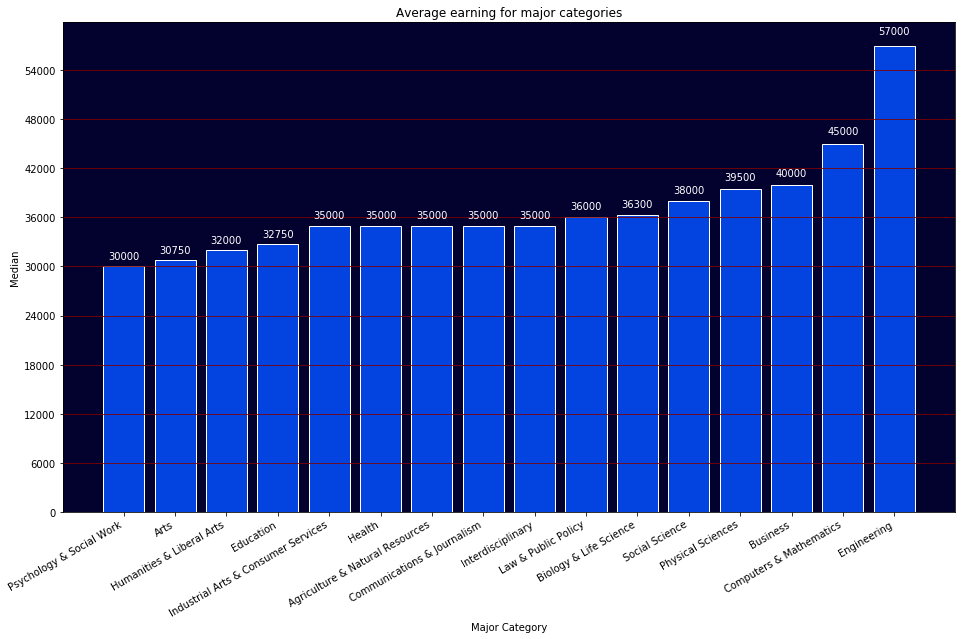

In [49]:
fig, ax = plt.subplots(figsize=(16,10))

# We will create bar plot from dictionary:
bar_plot = ax.bar(median_earning_and_unique_major_category.keys(),
    median_earning_and_unique_major_category.values(),
       color='xkcd:blue',
       edgecolor='xkcd:white')

ax.set_xticklabels(
    median_earning_and_unique_major_category.keys(),
    rotation=34.56789) # We will set xticklabels in angle to be easier to read

# The labels are centred horizontally, so when we rotate them 34.56789°,
# they appear to be aligned with the wrong bar.
# To fix this, we align the labels to the right
# and they'll get back to their correct (visual) position:

fig.autofmt_xdate()

# Let's increase the number of y-ticks to 10:
ax.yaxis.set_major_locator(plt.MaxNLocator(10)) 

#let's do some grid, but only y-axis
ax.grid(color='xkcd:dark red', axis='y')

# background layout:
ax.set_facecolor('xkcd:midnight')

# Tittles for everything:
ax.set_xlabel('Major Category')
ax.set_ylabel('Median')
ax.set_title('Average earning for major categories')

# Let's put values for each bar on top of it:
def top_value_label(data):
    """
    Attach a text label above each bar displaying its height
    """
    for val in data:
        height = val.get_height()
        ax.text(val.get_x() + val.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom', color='white')

top_value_label(bar_plot)



plt.show()

There are conclusions that were made earlier and this plot just confirms them. But there is one interesting thing here that we can notice: `Interdisciplinary` major can give decent money outcome. It's good to keep in mind that there are no easy answers to the question: what major is, in general, the best.

At the end of this project, we will put this, last, a plot with a grouped bar plot comparing the number of men with the number of women in each category of majors.

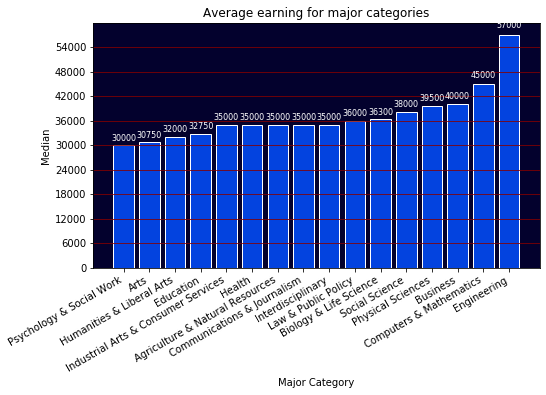

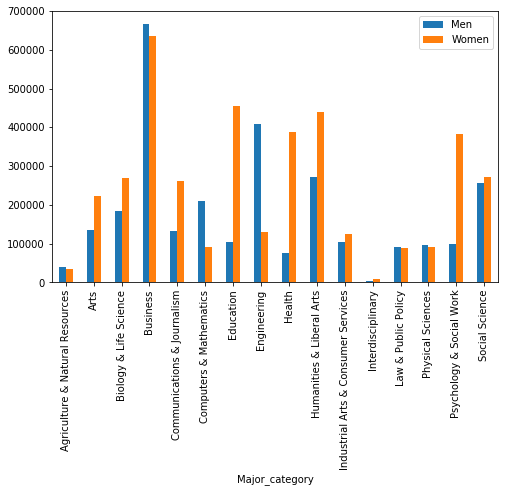

In [50]:
fig, ax = plt.subplots(figsize=(8,5))

# We will create bar plot from dictionary:
bar_plot = ax.bar(median_earning_and_unique_major_category.keys(),
    median_earning_and_unique_major_category.values(),
       color='xkcd:blue',
       edgecolor='xkcd:white')

ax.set_xticklabels(
    median_earning_and_unique_major_category.keys(),
    rotation=34.56789) # We will set xticklabels in angle to be easier to read

# The labels are centred horizontally, so when we rotate them 34.56789°,
# they appear to be aligned with the wrong bar.
# To fix this, we align the labels to the right
# and they'll get back to their correct (visual) position:

fig.autofmt_xdate()

# Let's increase the number of y-ticks to 10:
ax.yaxis.set_major_locator(plt.MaxNLocator(10)) 

#let's do some grid, but only y-axis
ax.grid(color='xkcd:dark red', axis='y')

# background layout:
ax.set_facecolor('xkcd:midnight')

# Tittles for everything:
ax.set_xlabel('Major Category')
ax.set_ylabel('Median')
ax.set_title('Average earning for major categories')

# Let's put values for each bar on top of it:
def top_value_label(data):
    """
    Attach a text label above each bar displaying its height
    """
    for val in data:
        height = val.get_height()
        ax.text(val.get_x() + val.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom', color='white', fontsize=8)

top_value_label(bar_plot)

recent_grads.groupby('Major_category')['Men', 'Women'].agg('sum').plot.bar(figsize=(8, 5))

plt.show()

